# **Setup**

In [136]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re

# **Data Import**

In [137]:
df = pd.read_excel('Data_Train.xlsx')

print(df.shape)
print(df.columns)

df.head()

(10683, 11)
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [138]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [139]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [140]:
print('Data Size Before: ',df.shape)

# Drop Missing Values
df.dropna(inplace=True)

print('Data Size After: ',df.shape)

Data Size Before:  (10683, 11)
Data Size After:  (10682, 11)


# **Data Pre-Processing**

## **Departure Date**

In [141]:
df.drop('Date_of_Journey',axis=1,inplace=True)

print(df.shape)
df.columns

(10682, 10)


Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

## **Extract Departure Hour & Min**

In [142]:
df['Dep_Time'].head()

0    22:20
1    05:50
2    09:25
3    18:05
4    16:50
Name: Dep_Time, dtype: object

In [143]:
print('Data Size Before: ',df.shape)

# Extract Hours & Min From Departure Time
df[['Dep_Hour','Dep_Min']] = df['Dep_Time'].str.split(':', expand=True)
df.drop('Dep_Time',axis=1,inplace=True)

print('Data Size After ',df.shape)
print(df.columns)
df.head(5)

Data Size Before:  (10682, 10)
Data Size After  (10682, 11)
Index(['Airline', 'Source', 'Destination', 'Route', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Dep_Hour', 'Dep_Min'],
      dtype='object')


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,16,50


## **Extract Arrival Hour & Min**

In [144]:
df['Arrival_Time'].head(5)

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
Name: Arrival_Time, dtype: object

In [145]:
print('Data Size Before: ', df.shape)

df['Arr_Hour'] = pd.to_datetime(df['Arrival_Time'],format='mixed').dt.hour
df['Arr_Min'] = pd.to_datetime(df['Arrival_Time'],format='mixed').dt.minute
df.drop('Arrival_Time',axis=1,inplace=True)

print('Data Size After: ', df.shape)
print(df.columns)
df.head()

Data Size Before:  (10682, 11)
Data Size After:  (10682, 12)
Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Dep_Hour', 'Dep_Min', 'Arr_Hour',
       'Arr_Min'],
      dtype='object')


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,09,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,50,21,35


## **Flight Duration**

In [146]:
df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [147]:
print('Data Size Before: ',df.shape)

df['Duration_Hour'] = df['Duration'].apply(lambda x: int(re.findall(r'(\d+)h',str(x))[0]) if 'h' in str(x) else 0)
df['Duration_Min'] = df['Duration'].apply(lambda x: int(re.findall(r'(\d+)m',str(x))[0]) if 'm' in str(x) else 0)
df.drop('Duration',axis=1,inplace=True)

print('Data Size After: ',df.shape)
print(df.columns)
df.head()

Data Size Before:  (10682, 12)
Data Size After:  (10682, 13)
Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Dep_Hour', 'Dep_Min', 'Arr_Hour',
       'Arr_Min', 'Duration_Hour', 'Duration_Min'],
      dtype='object')


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,09,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,21,35,4,45


## **Encode Airline Names**

In [148]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [149]:
df_Airlines = pd.get_dummies(df['Airline'],drop_first=False)
df_Airlines.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False


## **Encoding Source Names**

In [150]:
df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [151]:
df_Source = pd.get_dummies(df['Source'], drop_first=False)
df_Source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,True,False,False,False,False
1,False,False,False,True,False
2,False,False,True,False,False
3,False,False,False,True,False
4,True,False,False,False,False


## **Encoding Destination Names**

In [152]:
df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [153]:
df_Destination = pd.get_dummies(df['Destination'],drop_first=False)
df_Destination.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,False,True
1,True,False,False,False,False,False
2,False,True,False,False,False,False
3,True,False,False,False,False,False
4,False,False,False,False,False,True


## **Route**

In [154]:
df[['Route']].head(10)

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL
5,CCU → BLR
6,BLR → BOM → DEL
7,BLR → BOM → DEL
8,BLR → BOM → DEL
9,DEL → BOM → COK


In [155]:
print(df['Route'].nunique())
df['Route'].unique()[:50]

128


array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [156]:
# Drop Route Column
df.drop('Route',axis=1,inplace=True)

## **Additional Info**

In [157]:
df[['Additional_Info']].head(10)

,Additional_Info
0,No info
1,No info
2,No info
3,No info
4,No info
5,No info
6,In-flight meal not included
7,No info
8,In-flight meal not included
9,No info


In [158]:
print(df['Additional_Info'].nunique())
df['Additional_Info'].unique()

10


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [159]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [160]:
df[df['Additional_Info']=='Business class']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_Hour,Duration_Min
2924,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,79512,05,45,11,25,5,40
3032,Jet Airways,Banglore,New Delhi,1 stop,Business class,28097,05,50,12,20,6,30
5372,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,62427,05,45,12,25,6,40
10364,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,57209,09,45,14,25,4,40


In [161]:
# Drop Additional Info Column
df.drop('Additional_Info',axis=1,inplace=True)

In [162]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Dep_Hour',
       'Dep_Min', 'Arr_Hour', 'Arr_Min', 'Duration_Hour', 'Duration_Min'],
      dtype='object')

## **Total_Stops**

In [163]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [164]:
Total_Stop_Dict = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
print(Total_Stop_Dict)

df['Total_Stops_Int'] = df['Total_Stops'].apply(lambda x: Total_Stop_Dict[x])
# df.replace(Total_Stop_Dict, inplace=True)

df[['Total_Stops','Total_Stops_Int']].head(10)

{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}


,Total_Stops,Total_Stops_Int
0,non-stop,0
1,2 stops,2
2,2 stops,2
3,1 stop,1
4,1 stop,1
5,non-stop,0
6,1 stop,1
7,1 stop,1
8,1 stop,1
9,1 stop,1


In [165]:
# Drop Total_Stops Column
df.drop('Total_Stops',axis=1,inplace=True)

In [166]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Price', 'Dep_Hour', 'Dep_Min',
       'Arr_Hour', 'Arr_Min', 'Duration_Hour', 'Duration_Min',
       'Total_Stops_Int'],
      dtype='object')

## **Merge Dataframes**

In [167]:
df_final = pd.concat([df,df_Airlines,df_Source,df_Destination],axis=1)

# Drop AIrline, Source & Destination Column
df_final.drop(['Airline','Source','Destination'],axis=1,inplace=True)

print(df_final.shape)
df_final.head()

(10682, 31)


,Price,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_Hour,Duration_Min,Total_Stops_Int,Air Asia,Air India,...,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,3897,22,20,1,10,2,50,0,False,False,...,False,False,False,False,False,False,False,False,False,True
1,7662,05,50,13,15,7,25,2,False,True,...,False,False,True,False,True,False,False,False,False,False
2,13882,09,25,4,25,19,0,2,False,False,...,False,True,False,False,False,True,False,False,False,False
3,6218,18,05,23,30,5,25,1,False,False,...,False,False,True,False,True,False,False,False,False,False
4,13302,16,50,21,35,4,45,1,False,False,...,False,False,False,False,False,False,False,False,False,True


# **Data Exploration**

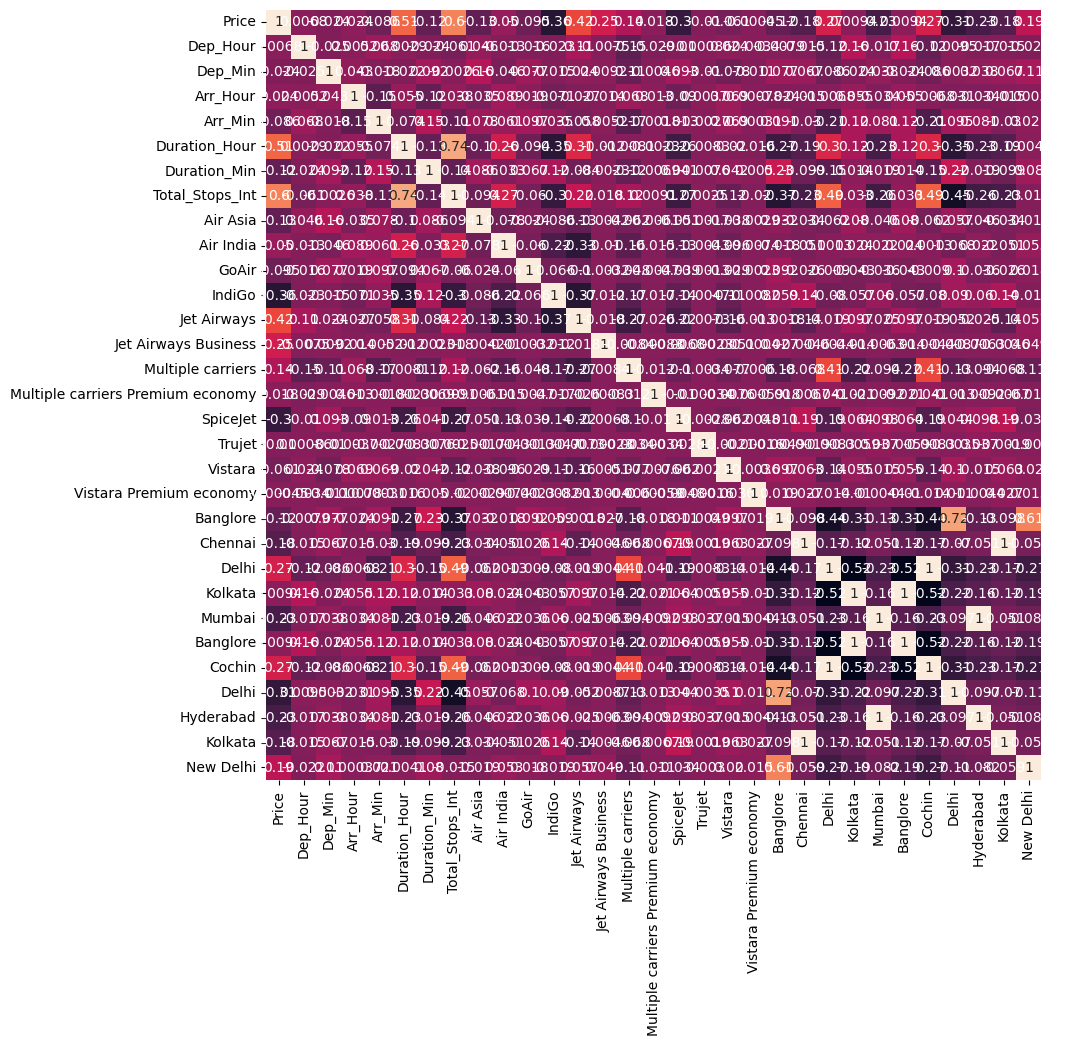

In [168]:
plt.figure(figsize=(10,10))
sns.heatmap(df_final.corr(),annot=True,cbar=False)
plt.show()

# **Data Split**

In [169]:
X = df_final.drop('Price',axis=1)
y = df_final['Price']

# **Data Models**

In [172]:
from sklearn.ensemble import GradientBoostingRegressor

model01 = GradientBoostingRegressor()
model01.fit(X,y)

print(model01.feature_importances_)

[1.00900170e-02 6.93916632e-03 1.56655338e-02 1.21461019e-02
 5.85310994e-01 2.59439898e-03 6.27948481e-02 4.53176073e-03
 2.13664340e-03 3.26127743e-03 3.33978747e-02 8.86501687e-02
 9.60021791e-02 1.42395123e-02 2.04953743e-04 6.90122594e-03
 0.00000000e+00 1.14402061e-03 3.11392138e-05 1.09204391e-02
 2.56909544e-05 9.46262176e-05 1.89923662e-03 4.40262402e-03
 1.98837785e-03 2.70175624e-04 1.75517790e-04 5.65397589e-03
 3.08796508e-04 2.82187229e-02]


In [180]:
model01_Analysis = pd.DataFrame(list(zip(model01.feature_names_in_,model01.feature_importances_)),columns=['Feature_Name','Feature_Importance'])
model01_Analysis.sort_values(by='Feature_Importance',ascending=False,inplace=True)
model01_Analysis

,Feature_Name,Feature_Importance
4,Duration_Hour,0.585311
12,Jet Airways Business,0.096002
11,Jet Airways,0.088650
6,Total_Stops_Int,0.062795
10,IndiGo,0.033398
29,New Delhi,0.028219
2,Arr_Hour,0.015666
13,Multiple carriers,0.014240
3,Arr_Min,0.012146
19,Banglore,0.010920
